In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/You Get Job OR NOT Using ANN/Placement_Data_Full_Class.csv')
df.head()

,Serial No.,Gender,SSC_Marks,SSC_Board,HSC_Marks,HSC_Board,HSC_Stream,Degree_Marks,Degree_Stream,Workex,etest_p,Spalization,MBA_Marks,Status,Salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial No.     215 non-null    int64  
 1   Gender         215 non-null    object 
 2   SSC_Marks      215 non-null    float64
 3   SSC_Board      215 non-null    object 
 4   HSC_Marks      215 non-null    float64
 5   HSC_Board      215 non-null    object 
 6   HSC_Stream     215 non-null    object 
 7   Degree_Marks   215 non-null    float64
 8   Degree_Stream  215 non-null    object 
 9   Workex         215 non-null    object 
 10  etest_p        215 non-null    float64
 11  Spalization    215 non-null    object 
 12  MBA_Marks      215 non-null    float64
 13  Status         215 non-null    object 
 14  Salary         148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [26]:
df.describe(include='O')

,Gender,SSC_Board,HSC_Board,HSC_Stream,Degree_Stream,Workex,Spalization,Status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [27]:
df.describe(include='float')

,SSC_Marks,HSC_Marks,Degree_Marks,etest_p,MBA_Marks,Salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [28]:
df.isnull().sum()

Serial No.        0
Gender            0
SSC_Marks         0
SSC_Board         0
HSC_Marks         0
HSC_Board         0
HSC_Stream        0
Degree_Marks      0
Degree_Stream     0
Workex            0
etest_p           0
Spalization       0
MBA_Marks         0
Status            0
Salary           67
dtype: int64

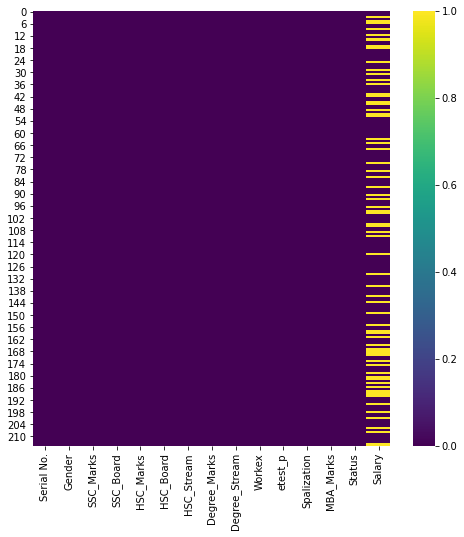

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
column=df.select_dtypes(include=['object'])
for col in column:
  display(df[col].value_counts())

M    139
F     76
Name: Gender, dtype: int64

Central    116
Others      99
Name: SSC_Board, dtype: int64

Others     131
Central     84
Name: HSC_Board, dtype: int64

Commerce    113
Science      91
Arts         11
Name: HSC_Stream, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Degree_Stream, dtype: int64

No     141
Yes     74
Name: Workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: Spalization, dtype: int64

Placed        148
Not Placed     67
Name: Status, dtype: int64

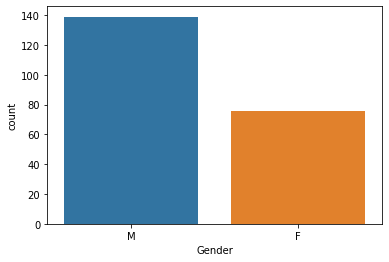

In [9]:
sns.countplot(x=df['Gender'],data=df)

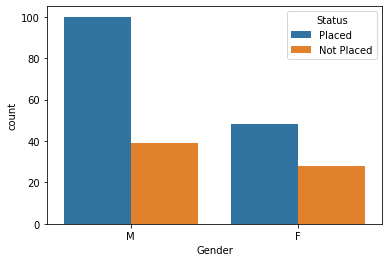

In [10]:
# From Below Figure We Can see That Male Member Has Got Placed As Comapred To Female
sns.countplot(x=df['Gender'],hue='Status',data=df)

Gender
F    267291.666667
M    298910.000000
Name: Salary, dtype: float64

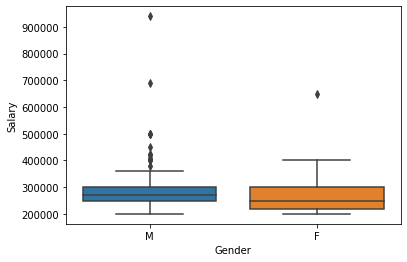

In [11]:
# From Below We can See That Male Have Higher salary As Compared To Female
sns.boxplot(x=df['Gender'],y=df['Salary'],data=df)
df.groupby('Gender')['Salary'].mean()

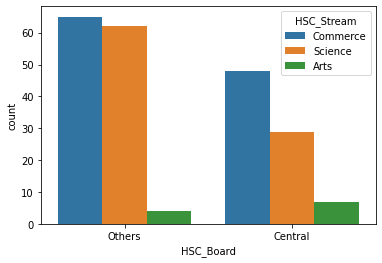

In [12]:
# From Below We Can say That Other Board Member Are More As Comapred To Central 
sns.countplot(x=df['HSC_Board'],hue=df['HSC_Stream'],data=df)

In [13]:
df.columns

Index(['Serial No.', 'Gender', 'SSC_Marks', 'SSC_Board', 'HSC_Marks',
       'HSC_Board', 'HSC_Stream', 'Degree_Marks', 'Degree_Stream', 'Workex',
       'etest_p', 'Spalization', 'MBA_Marks', 'Status', 'Salary'],
      dtype='object')

Text(0.5, 1.0, 'Post Graduation Percentage')

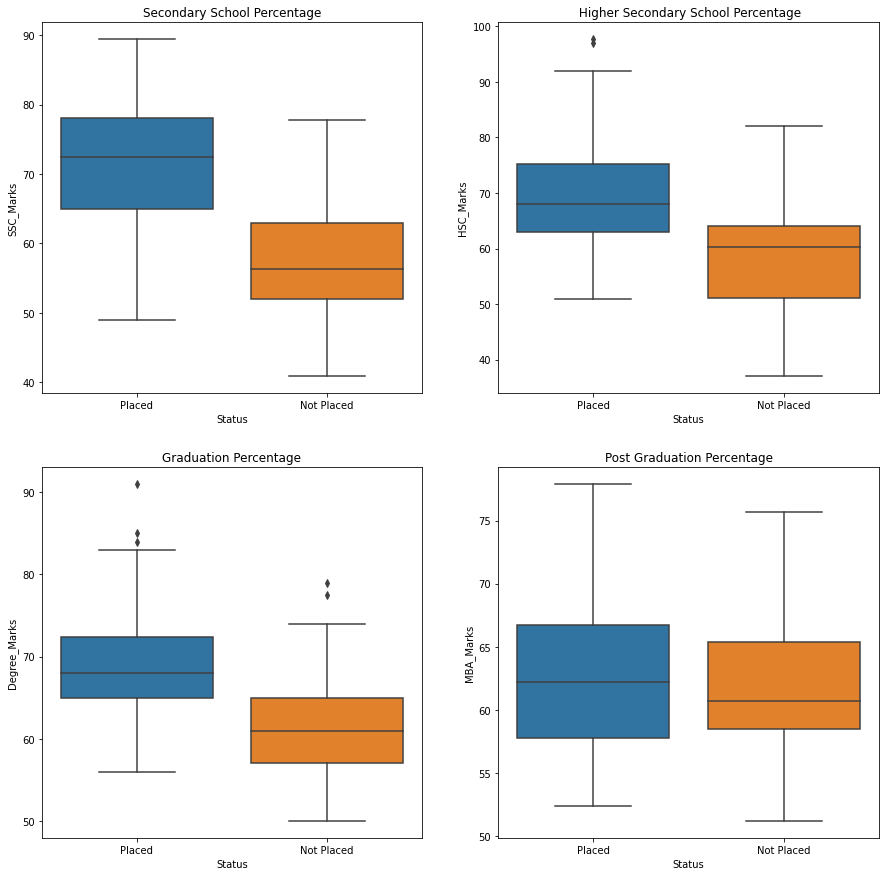

In [14]:
plt.figure(figsize= (15,15))
ax=plt.subplot(221)
sns.boxplot(x='Status',y='SSC_Marks',data=df)
ax.set_title('Secondary School Percentage')
ax=plt.subplot(222)
sns.boxplot(x='Status',y='HSC_Marks',data=df)
ax.set_title(' Higher Secondary School Percentage')
ax=plt.subplot(223)
sns.boxplot(x='Status',y='Degree_Marks',data=df)
ax.set_title('Graduation Percentage')
ax=plt.subplot(224)
sns.boxplot(x='Status',y='MBA_Marks',data=df)
ax.set_title('Post Graduation Percentage')

Text(0.5, 1.0, 'Gender Vs Salary Based On Experiance')

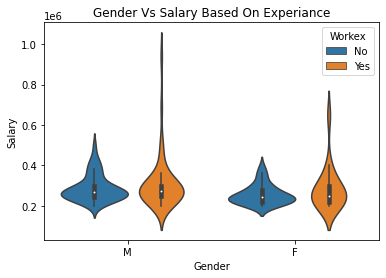

In [15]:
# From Above All figure We Can say That Students Have More Marks are Getting Placed As Comapred to Lower Marks
# But From Below Figure Students Have work experience Are Getting Placed More
sns.violinplot(x=df['Gender'],y=df['Salary'],hue=df['Workex'],data=df)
plt.title('Gender Vs Salary Based On Experiance')

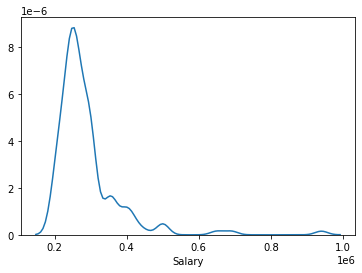

In [16]:
sns.distplot(df['Salary'],bins=50,hist=False)

In [29]:
df.head()

,Serial No.,Gender,SSC_Marks,SSC_Board,HSC_Marks,HSC_Board,HSC_Stream,Degree_Marks,Degree_Stream,Workex,etest_p,Spalization,MBA_Marks,Status,Salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [30]:
df.drop(['Serial No.', 'Salary'],axis=1,inplace=True)
df.head()

,Gender,SSC_Marks,SSC_Board,HSC_Marks,HSC_Board,HSC_Stream,Degree_Marks,Degree_Stream,Workex,etest_p,Spalization,MBA_Marks,Status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [31]:
df['Gender']=df.Gender.map({'M': 0, 'F': 1})
df['SSC_Board']=df.SSC_Board.map({'Others': 0, 'Central': 1})
df['HSC_Board']=df.HSC_Board.map({'Others': 0, 'Central': 1})
df['HSC_Stream']=df.HSC_Stream.map({"Commerce" : 0, "Science" : 1, "Arts" : 2})
df['Degree_Stream']=df.Degree_Stream.map({"Comm&Mgmt" : 0, "Sci&Tech" : 1, "Others" : 2})
df['Workex']=df.Workex.map({"No" : 0, "Yes" :1})
df['Spalization']=df.Spalization.map({"Mkt&Fin" : 0, "Mkt&HR" : 1})
df['Status']=df.Status.map({'Placed': 0, 'Not Placed': 1})

In [32]:
df.head()

,Gender,SSC_Marks,SSC_Board,HSC_Marks,HSC_Board,HSC_Stream,Degree_Marks,Degree_Stream,Workex,etest_p,Spalization,MBA_Marks,Status
0,0,67.00,0,91.00,0,0,58.00,1,0,55.0,1,58.80,0
1,0,79.33,1,78.33,0,1,77.48,1,1,86.5,0,66.28,0
2,0,65.00,1,68.00,1,2,64.00,0,0,75.0,0,57.80,0
3,0,56.00,1,52.00,1,1,52.00,1,0,66.0,1,59.43,1
4,0,85.80,1,73.60,1,0,73.30,0,0,96.8,0,55.50,0


In [33]:
df.drop(['SSC_Board','HSC_Board'],axis=1,inplace=True)
df.head()

,Gender,SSC_Marks,HSC_Marks,HSC_Stream,Degree_Marks,Degree_Stream,Workex,etest_p,Spalization,MBA_Marks,Status
0,0,67.00,91.00,0,58.00,1,0,55.0,1,58.80,0
1,0,79.33,78.33,1,77.48,1,1,86.5,0,66.28,0
2,0,65.00,68.00,2,64.00,0,0,75.0,0,57.80,0
3,0,56.00,52.00,1,52.00,1,0,66.0,1,59.43,1
4,0,85.80,73.60,0,73.30,0,0,96.8,0,55.50,0


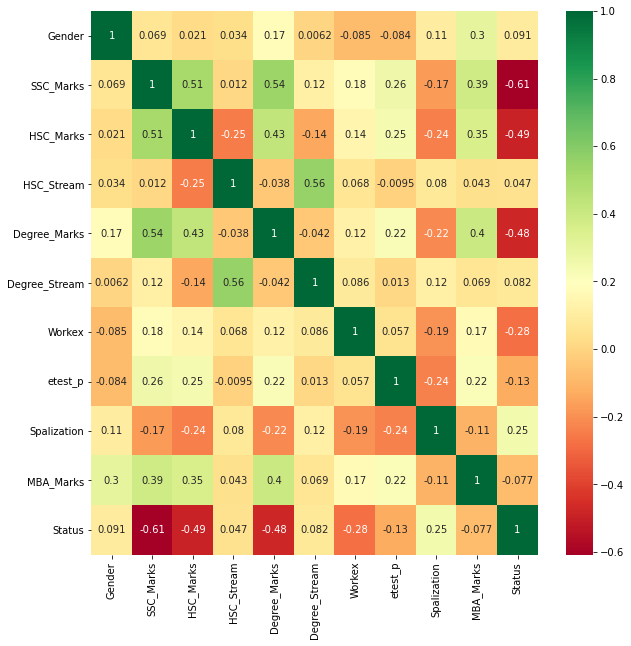

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [35]:
# Selecting train and test data
X=df[['SSC_Marks',	'HSC_Marks',	'HSC_Stream',	'Degree_Marks',	'Degree_Stream',	'Workex',	'etest_p',	'Spalization',	'MBA_Marks']]

y=df['Status']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [38]:
import keras

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,PReLU,ELU

In [66]:
classifier=Sequential()

In [65]:
X_train.shape

(150, 9)

In [67]:
classifier.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu',input_dim=9))

In [68]:
classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))

In [69]:
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))

In [70]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [71]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 19ms/step - loss: 9.6327 - accuracy: 0.6900 - val_loss: 5.0635 - val_accuracy: 0.6600
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 3.1179 - accuracy: 0.5400 - val_loss: 2.0131 - val_accuracy: 0.4200
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 1.4205 - accuracy: 0.5900 - val_loss: 1.1004 - val_accuracy: 0.6600
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 1.0142 - accuracy: 0.6800 - val_loss: 0.8346 - val_accuracy: 0.6200
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 0.8648 - accuracy: 0.6000 - val_loss: 0.5630 - val_accuracy: 0.6800
Epoch 6/30
10/10 [==============================] - 0s 5ms/step - loss: 0.6276 - accuracy: 0.7600 - val_loss: 0.4830 - val_accuracy: 0.7800
Epoch 7/30
10/10 [==============================] - 0s 5ms/step - loss: 0.5333 - accuracy: 0.7700 - val_loss: 0.4139 - val_accuracy: 0.8400
Epoch 8/30
10/10 [=

In [73]:
model_history.params

{'epochs': 30, 'steps': 10, 'verbose': 1}

In [74]:
prediction=classifier.predict(X_test)
prediction=(prediction>0.5)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,prediction)
cm

array([[42,  4],
       [10,  9]])

In [78]:
score=accuracy_score(y_test,prediction)
score

0.7846153846153846

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [80]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Activation, Dense
from keras.activations import relu, sigmoid
from keras.layers import Dropout

In [81]:
def create_model(layers,activation):
  model=Sequential()
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

  model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [82]:
model=KerasClassifier(build_fn=create_model,verbose=0)

In [83]:
layers=[(20),(40,20),(45,30,15)]
activations=['sigmoid','relu']

In [84]:
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30,50,100])

In [85]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5)

In [87]:
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


In [88]:
print(grid_result.best_score_, grid_result.best_params_)

0.8066666722297668 {'layers': (40, 20), 'epochs': 50, 'batch_size': 256, 'activation': 'relu'}
